In [2]:
import os
import csv
import pandas as pd
import numpy as np
from numpy import asarray
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt



cwd = os.getcwd()

Part 1: Pre-Processing

In [6]:
##split dataset with freq in R 75/25

#import training csv from R
df = pd.read_csv(r'/content/data_tidy.csv')
df.head(20)



,file_number,hh,clip,coder,rec,round,note,time,animals,position,top,caregiver_activity,surface,child_hand_interaction,shoes,bottom,caregiver,event,child_mouth_object,date,child_mouth_object_cat
0,141322,hh204273,clip1,HK,rec1,r1,NaN,366644,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherWater,2019-12-03,Liquids
1,141322,hh204273,clip1,HK,rec1,r1,NaN,368159,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids
2,141322,hh204273,clip1,HK,rec1,r1,NaN,396162,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids
3,141322,hh204273,clip1,HK,rec1,r1,NaN,410986,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids
4,141322,hh204273,clip1,HK,rec1,r1,NaN,797238,AnimalsNone,Standing,coveredTop,WatchingPlaying,OutsidDirt,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,DrinkingWater,2019-12-03,Liquids
5,141322,hh204273,clip1,HK,rec1,r1,NaN,1293331,AnimalsNone,Carried,coveredTop,WatchingPlaying,BedChairLap,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherFood,2019-12-03,Foods
6,141322,hh204273,clip1,HK,rec1,r1,NaN,1303739,AnimalsNone,Carried,coveredTop,WatchingPlaying,BedChairLap,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OwnHandSkin,2019-12-03,Hands
7,141322,hh204273,clip1,HK,rec1,r1,NaN,1321550,AnimalsNone,Carried,coveredTop,WatchingPlaying,BedChairLap,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherFood,2019-12-03,Foods
8,141322,hh204273,clip1,HK,rec1,r1,NaN,1338002,AnimalsNone,Carried,coveredTop,WatchingPlaying,BedChairLap,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherFood,2019-12-03,Foods
9,141322,hh204273,clip1,HK,rec1,r1,NaN,1343865,AnimalsNone,Carried,coveredTop,WatchingPlaying,BedChairLap,ObjInMouth,NoShoes,UNcoveredBottom,Mother,Playing,OtherFood,2019-12-03,Foods


In [15]:
#each event is 1
df["freq"] = 1

#group and sum of "freq" = frequencies for each individual
data_tidy = df.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()

array(['OtherWater', 'DrinkingWater', 'OtherFood', 'OwnHandSkin', 'Fruit',
       'OtherObject', 'PlantVegetation', 'Cloth', 'OtherHandSkin',
       'Sauce', 'MainFood', 'Plastic', 'Soil', 'Porridge', 'OtherDrink',
       'Feces', 'Breasts', 'Ash', 'Milk', nan], dtype=object)

Part 2: Algorithmic Subsetting

In [12]:
#which dataframe to you want to subset?

#max_sample: How big do you want your largest sample to be?
#min_sample: How small do you want your minimum sample to be?
#increment size: How many increments be between min and max samples?
#rounds: How many times do you want to try this?
#max_bias: What's the highest percentage of "bias" you are willing to tolerate of subset freq relative to overall subset?

def best_subset(dataframe, min_sample, max_sample, increment, rounds=5, max_bias = 25):

  sample_size = np.linspace(int(min_sample), int(max_sample), int(increment)).tolist()
  #dictionary for dataframe
  subset_dict = {}
  #dictionary for variance of each subset
  var_dict = {}

  #5 times
  for i in range(0, int(rounds)):

    #pull samples of whatever size user picks
    for item in sample_size:
      subset = df.sample( n = int(item))

      #group the subset so we have total frequencies
      grouped = subset.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()
      
      #check the bias of subset vs df
      bias = ((np.mean(grouped["freq"]) - np.mean(data_tidy["freq"]))/np.mean(data_tidy["freq"]))*100

      #if bias is higher than the max we want, don't store this subset
      if np.absolute(bias) > max_bias:
        continue

      #put subset in the subset_dict
      subset_dict[i] = grouped

      #put variance of each subset in var_dict
      var_dict[i] = np.var(grouped["freq"])

  #max(var_dict.values())
      
  #return subset with largest variance
  return(subset_dict[max(var_dict, key=var_dict.get)])

    
best = best_subset(df, 1000, 100000, 4, max_bias = 10)

In [13]:
best["child"]

,hh,round,rec,child_hand_interaction,child_mouth_object_cat,file_number,note,time,freq
0,hh164001,r1,rec1,Breastfeeding,Breasts,975113,0.0,22832643,10
1,hh164001,r1,rec1,ObjInMouth,Foods,4927522,0.0,86742552,50
2,hh164001,r1,rec1,ObjInMouth,Hands,6984843,0.0,131231762,59
3,hh164001,r1,rec1,ObjInMouth,Liquids,660359,0.0,5542335,7
4,hh164001,r1,rec1,ObjInMouth,Objects,6384031,0.0,67284909,53
...,...,...,...,...,...,...,...,...,...
1347,hh222213.younger,r2,rec1,ObjInMouth,Soil or ash,256656,0.0,5206941,2
1348,hh222245,r1,rec1,ObjInMouth,Foods,28265636,0.0,359761429,244
1349,hh222245,r1,rec1,ObjInMouth,Hands,9972741,0.0,92796635,75
1350,hh222245,r1,rec1,ObjInMouth,Liquids,5706240,0.0,53968554,40


In [20]:
#which "dataframe" to you want to subset?
#which "column" do you want to be most representative

#max bias
#largest sample
#increment size

def best_subset(dataframe, min_sample, max_sample, increment, rounds=5):
  sample_size = np.linspace(int(min_sample), int(max_sample), int(increment)).tolist()
  #dictionary for dataframe
  subset_dict = {}
  #dictionary for variance of each subset
  var_dict = {}

  #5 times
  for i in range(0, 5):

    #pull samples of size [20,000, 40,000, 60,000]
    for item in sample_size:

      #sample the larger dataframe (between 100& 150)
      subset = df.sample( n= int(item))

      #group the subset so we have total frequencies
      grouped = subset.groupby(["hh", "round", "rec", "child_hand_interaction", "child_mouth_object_cat"]).sum().reset_index()
      
      #put each subset in the subset dictionary
      subset_dict[i] = grouped

      #calculate variance of freq column for each subset
      var_dict[i] = np.var(grouped["freq"])
  #max(var_dict.values())
      
  #return subset with largest variance
  return(subset_dict[max(var_dict, key=var_dict.get)], np.mean(subset_dict[max(var_dict, key=var_dict.get)]["freq"]))

    #return subset corresponding to that index

    
best_subset(df, 10000, 150000, 3)

ValueError: ignored

In [ ]:
## Method 2: Entropy?

#base new subset, set variance
base = df.sample(n = 1)
var = 0

#Add 20,000 possible rows
for i in range (0, 1000):

  #new possible addition
  subset = df.sample( n = 1)

  #copy of base df
  temp = base.copy()

  #concat base row to copy
  new_subset=pd.concat([temp, subset], axis = 0)

  #if variance increases on new_subset, make new_subset my base
  if np.var(new_subset["freq"]) > var:
    base = new_subset
    var = np.var(new_subset)

  else:
    continue


base

In [41]:
## Method 2: Entropy?

#base new subset, set variance
base = df.sample(n = 1)
var = 0

#Add 20,000 possible rows
for i in range (0, 1000):

  #new possible addition
  subset = df.sample( n = 1)

  #copy of base df
  temp = base.copy()

  #concat base row to copy
  new_subset=pd.concat([temp, subset], axis = 0)

  #if variance increases on new_subset, make new_subset my base
  if np.var(new_subset["freq"]) > var:
    base = new_subset
    var = np.var(new_subset)

  else:
    continue


base

,file_number,hh,clip,coder,rec,round,note,time,animals,position,top,caregiver_activity,surface,child_hand_interaction,shoes,bottom,caregiver,event,child_mouth_object,date,child_mouth_object_cat,freq
49986,101800,hh204158.younger,clip2,JB,live,r1,NaN,441426,AnimalsNone,Sitting,coveredTop,Feeding,OutsideMatSackPlastic,ObjInMouth,NoShoes,skirt/dress,Mother,Playing,OtherDrink,2020-02-22,Liquids,1


In [ ]:
dummy = pd.get_dummies(df[["animals", "position", "caregiver_activity"]])
print(dummy)

        animals_AnimalsNone  ...  caregiver_activity_WatchingPlaying
0                         1  ...                                   1
1                         1  ...                                   1
2                         1  ...                                   1
3                         1  ...                                   1
4                         1  ...                                   1
...                     ...  ...                                 ...
238335                    1  ...                                   0
238336                    1  ...                                   0
238337                    1  ...                                   0
238338                    1  ...                                   0
238339                    1  ...                                   0

[238340 rows x 18 columns]


In [55]:
dummy

NameError: ignored

Part 3: Comparing to Our Larger Dataset

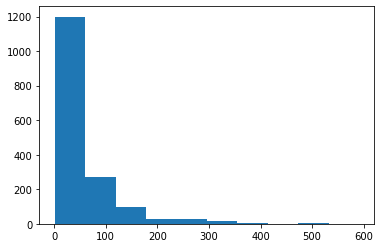

In [70]:
plt.hist((best_subset(df, "freq", [60000, 70000, 80000]))["freq"])
plt.show() 

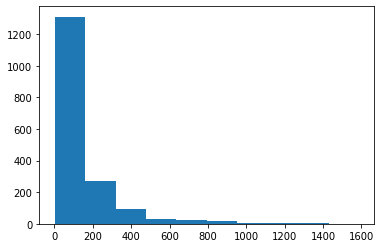

In [72]:
plt.hist(data_tidy["freq"])
plt.show() 

[10, 12, 14, 16, 18]